In [1]:
import numpy as np
import csv
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as Data
import torchvision

In [2]:
from sklearn.model_selection import train_test_split
 #首先，读取.CSV文件成矩阵的形式。
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
 #对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
X, y = my_matrix[:,:-1],my_matrix[:,-1]


In [3]:
#print(y_train)
label = y 
#print(y_train)
sx_1 = 1
sx_2 =(sx_1*0.99*0.27*0.99)
sx_8 = sx_1*0.99*0.27*0.25*0.99
sx_7 = sx_1*0.99*0.27*0.25*1
sx_6 = sx_1*0.99*0.31*0.99
sx_3 = sx_1*0.99*0.31*0.34
sx_4 = sx_1*0.99*0.31*0.51*0.47*0.88*0.78
sx_5 = sx_1*0.99*0.31*0.51*0.47*0.88*0.78*0.78
print(sx_6)
y = [sx_2 if i == 1 else i for i in y]
y = [sx_8 if i == 7 else i for i in y]
y = [1 if i == 0 else i for i in y]
y = [sx_3 if i == 2 else i for i in y]
y = [sx_4 if i == 3 else i for i in y]
y = [sx_5 if i == 4 else i for i in y]
y = [sx_6 if i == 5 else i for i in y]
y = [sx_7 if i == 6 else i for i in y]

#y_train = np.array(y_train)
print(y)

0.303831
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.2646270000000

In [4]:
 #利用train_test_split方法，将X,y随机划分问，训练集（X_train），训练集标签（X_test），测试卷（y_train），
 #测试集标签（y_test），安训练集：测试集=7:3的
 #概率划分，到此步骤，可以直接对数据进行处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
 #此步骤，是为了将训练集与数据集的数据分别保存为CSV文件
 #np.column_stack将两个矩阵进行组合连接
train= np.column_stack((X_train,y_train))
 #numpy.savetxt 将txt文件保存为.csv结尾的文件
np.savetxt('train_usual.csv',train, delimiter = ',')
test = np.column_stack((X_test, y_test))
np.savetxt('test_usual.csv', test, delimiter = ',')

In [5]:
#print(y_train)
label = y_train
#print(label)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:

torch_x = torch.from_numpy(X_train)
torch_y = torch.from_numpy(y_train)
test_x = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)
y_train = torch.tensor(torch_y, dtype=torch.float32)
y_test = torch.tensor(test_y,dtype = torch.float32)
x_test = torch.tensor(test_x , dtype=torch.float32)
x_train = torch.tensor(torch_x, dtype=torch.float32)

/home/ysx/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/home/ysx/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/ysx/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/home/ysx/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().de

In [7]:
#print(y_train)


In [8]:
#Hyper parameters
EPOCH = 500
BATCH_SIZE = 100
TIME_STEP = 20
INPUT_SIZE = 60
LR = 0.001

In [9]:

x_test = x_test.reshape(x_test.shape[0], TIME_STEP, INPUT_SIZE)
x_train = x_train.reshape(x_train.shape[0], TIME_STEP, INPUT_SIZE)
#print(x_train.shape,x_test.shape)
torch_dataset = Data.TensorDataset(x_train,y_train )
train_loader = Data.DataLoader(dataset= torch_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=2)
#print(x_train,x_test)

In [10]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=3,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 1)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [14]:
class My_loss(nn.Module):
    def __init__(self):
    

    
        super().__init__()
        
    def forward(self , x, y):
        time = 1
        ave = torch.tensor(0)
        for n in range(len(x)):
            if y[n] == 1:
                ave = torch.add(x[n], ave)
                time += 1
        #print(ave,time)
        ave  = torch.true_divide(ave,time) 
        div = torch.div(x,ave)
        loss = torch.mean(torch.pow((div - y),2))
        return loss

In [15]:
#print(len(X_out),len(y))

In [16]:
rnn =  RNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
loss_func = My_loss()

RNN(
  (rnn): LSTM(60, 64, num_layers=3, batch_first=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [17]:
loss_x = []
loss_y = []
for n in range(2000):
    loss_x.append(n)
    train_out = rnn(x_train)
    #print(train_out.size())
    
    loss = loss_func(train_out, y_train)
    #print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_y.append(loss.data.item())
    
    test_out = rnn(x_test)
    loss_test = loss_func(test_out,y_test)
    print('times:'+str(n)+' train:'+str(loss)+' test:'+ str(loss_test))
    

times:0 train:tensor(0.6767, grad_fn=<MeanBackward0>) test:tensor(0.6881, grad_fn=<MeanBackward0>)
times:1 train:tensor(0.6617, grad_fn=<MeanBackward0>) test:tensor(0.6714, grad_fn=<MeanBackward0>)
times:2 train:tensor(0.6453, grad_fn=<MeanBackward0>) test:tensor(0.6433, grad_fn=<MeanBackward0>)
times:3 train:tensor(0.6177, grad_fn=<MeanBackward0>) test:tensor(0.5845, grad_fn=<MeanBackward0>)
times:4 train:tensor(0.5599, grad_fn=<MeanBackward0>) test:tensor(0.4242, grad_fn=<MeanBackward0>)
times:5 train:tensor(0.4003, grad_fn=<MeanBackward0>) test:tensor(2.1731, grad_fn=<MeanBackward0>)
times:6 train:tensor(2.0567, grad_fn=<MeanBackward0>) test:tensor(0.9399, grad_fn=<MeanBackward0>)
times:7 train:tensor(0.9064, grad_fn=<MeanBackward0>) test:tensor(0.8223, grad_fn=<MeanBackward0>)
times:8 train:tensor(0.7931, grad_fn=<MeanBackward0>) test:tensor(0.7795, grad_fn=<MeanBackward0>)
times:9 train:tensor(0.7517, grad_fn=<MeanBackward0>) test:tensor(0.7575, grad_fn=<MeanBackward0>)
times:10 t

times:83 train:tensor(0.2208, grad_fn=<MeanBackward0>) test:tensor(0.2421, grad_fn=<MeanBackward0>)
times:84 train:tensor(0.2200, grad_fn=<MeanBackward0>) test:tensor(0.2426, grad_fn=<MeanBackward0>)
times:85 train:tensor(0.2198, grad_fn=<MeanBackward0>) test:tensor(0.2433, grad_fn=<MeanBackward0>)
times:86 train:tensor(0.2199, grad_fn=<MeanBackward0>) test:tensor(0.2439, grad_fn=<MeanBackward0>)
times:87 train:tensor(0.2202, grad_fn=<MeanBackward0>) test:tensor(0.2444, grad_fn=<MeanBackward0>)
times:88 train:tensor(0.2203, grad_fn=<MeanBackward0>) test:tensor(0.2446, grad_fn=<MeanBackward0>)
times:89 train:tensor(0.2203, grad_fn=<MeanBackward0>) test:tensor(0.2444, grad_fn=<MeanBackward0>)
times:90 train:tensor(0.2200, grad_fn=<MeanBackward0>) test:tensor(0.2438, grad_fn=<MeanBackward0>)
times:91 train:tensor(0.2193, grad_fn=<MeanBackward0>) test:tensor(0.2429, grad_fn=<MeanBackward0>)
times:92 train:tensor(0.2185, grad_fn=<MeanBackward0>) test:tensor(0.2417, grad_fn=<MeanBackward0>)


times:165 train:tensor(0.1938, grad_fn=<MeanBackward0>) test:tensor(0.2165, grad_fn=<MeanBackward0>)
times:166 train:tensor(0.1935, grad_fn=<MeanBackward0>) test:tensor(0.2162, grad_fn=<MeanBackward0>)
times:167 train:tensor(0.1933, grad_fn=<MeanBackward0>) test:tensor(0.2160, grad_fn=<MeanBackward0>)
times:168 train:tensor(0.1931, grad_fn=<MeanBackward0>) test:tensor(0.2157, grad_fn=<MeanBackward0>)
times:169 train:tensor(0.1928, grad_fn=<MeanBackward0>) test:tensor(0.2154, grad_fn=<MeanBackward0>)
times:170 train:tensor(0.1926, grad_fn=<MeanBackward0>) test:tensor(0.2152, grad_fn=<MeanBackward0>)
times:171 train:tensor(0.1923, grad_fn=<MeanBackward0>) test:tensor(0.2149, grad_fn=<MeanBackward0>)
times:172 train:tensor(0.1921, grad_fn=<MeanBackward0>) test:tensor(0.2146, grad_fn=<MeanBackward0>)
times:173 train:tensor(0.1919, grad_fn=<MeanBackward0>) test:tensor(0.2144, grad_fn=<MeanBackward0>)
times:174 train:tensor(0.1916, grad_fn=<MeanBackward0>) test:tensor(0.2141, grad_fn=<MeanBa

times:247 train:tensor(0.1842, grad_fn=<MeanBackward0>) test:tensor(0.2084, grad_fn=<MeanBackward0>)
times:248 train:tensor(0.1840, grad_fn=<MeanBackward0>) test:tensor(0.2080, grad_fn=<MeanBackward0>)
times:249 train:tensor(0.1837, grad_fn=<MeanBackward0>) test:tensor(0.2079, grad_fn=<MeanBackward0>)
times:250 train:tensor(0.1837, grad_fn=<MeanBackward0>) test:tensor(0.2080, grad_fn=<MeanBackward0>)
times:251 train:tensor(0.1838, grad_fn=<MeanBackward0>) test:tensor(0.2080, grad_fn=<MeanBackward0>)
times:252 train:tensor(0.1837, grad_fn=<MeanBackward0>) test:tensor(0.2079, grad_fn=<MeanBackward0>)
times:253 train:tensor(0.1835, grad_fn=<MeanBackward0>) test:tensor(0.2078, grad_fn=<MeanBackward0>)
times:254 train:tensor(0.1834, grad_fn=<MeanBackward0>) test:tensor(0.2079, grad_fn=<MeanBackward0>)
times:255 train:tensor(0.1834, grad_fn=<MeanBackward0>) test:tensor(0.2080, grad_fn=<MeanBackward0>)
times:256 train:tensor(0.1834, grad_fn=<MeanBackward0>) test:tensor(0.2078, grad_fn=<MeanBa

times:329 train:tensor(0.1795, grad_fn=<MeanBackward0>) test:tensor(0.2036, grad_fn=<MeanBackward0>)
times:330 train:tensor(0.1794, grad_fn=<MeanBackward0>) test:tensor(0.2035, grad_fn=<MeanBackward0>)
times:331 train:tensor(0.1794, grad_fn=<MeanBackward0>) test:tensor(0.2034, grad_fn=<MeanBackward0>)
times:332 train:tensor(0.1793, grad_fn=<MeanBackward0>) test:tensor(0.2034, grad_fn=<MeanBackward0>)
times:333 train:tensor(0.1793, grad_fn=<MeanBackward0>) test:tensor(0.2033, grad_fn=<MeanBackward0>)
times:334 train:tensor(0.1792, grad_fn=<MeanBackward0>) test:tensor(0.2033, grad_fn=<MeanBackward0>)
times:335 train:tensor(0.1792, grad_fn=<MeanBackward0>) test:tensor(0.2032, grad_fn=<MeanBackward0>)
times:336 train:tensor(0.1791, grad_fn=<MeanBackward0>) test:tensor(0.2032, grad_fn=<MeanBackward0>)
times:337 train:tensor(0.1791, grad_fn=<MeanBackward0>) test:tensor(0.2031, grad_fn=<MeanBackward0>)
times:338 train:tensor(0.1790, grad_fn=<MeanBackward0>) test:tensor(0.2030, grad_fn=<MeanBa

times:411 train:tensor(0.1747, grad_fn=<MeanBackward0>) test:tensor(0.1973, grad_fn=<MeanBackward0>)
times:412 train:tensor(0.1746, grad_fn=<MeanBackward0>) test:tensor(0.1972, grad_fn=<MeanBackward0>)
times:413 train:tensor(0.1746, grad_fn=<MeanBackward0>) test:tensor(0.1971, grad_fn=<MeanBackward0>)
times:414 train:tensor(0.1745, grad_fn=<MeanBackward0>) test:tensor(0.1970, grad_fn=<MeanBackward0>)
times:415 train:tensor(0.1744, grad_fn=<MeanBackward0>) test:tensor(0.1969, grad_fn=<MeanBackward0>)
times:416 train:tensor(0.1744, grad_fn=<MeanBackward0>) test:tensor(0.1969, grad_fn=<MeanBackward0>)
times:417 train:tensor(0.1743, grad_fn=<MeanBackward0>) test:tensor(0.1968, grad_fn=<MeanBackward0>)
times:418 train:tensor(0.1742, grad_fn=<MeanBackward0>) test:tensor(0.1967, grad_fn=<MeanBackward0>)
times:419 train:tensor(0.1742, grad_fn=<MeanBackward0>) test:tensor(0.1966, grad_fn=<MeanBackward0>)
times:420 train:tensor(0.1741, grad_fn=<MeanBackward0>) test:tensor(0.1965, grad_fn=<MeanBa

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (864,) and (0,)

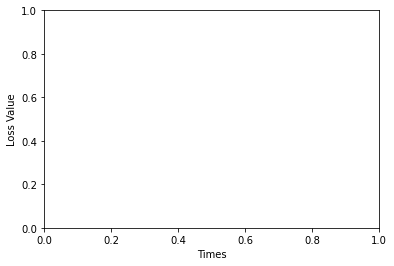

In [19]:
plt.xlabel('Times')
plt.ylabel('Loss Value')
plt.plot(loss_x,loss_y)
plt.savefig('Analysis_loss.tif', dpi = 400)
plt.show()

In [20]:
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
 #对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
X, y = my_matrix[:,:-1],my_matrix[:,-1]
torch_y = torch.from_numpy(y)
y_input = torch.tensor(torch_y , dtype=torch.float32)
X_loss = []
axis = []
for n in range(40):
    #X_minloss = 0
    #print('start'+ str(X_minloss))
    axis.append(n)
    for i in range(30):
        for j in range(len(X)):
            X[j][n*30+i] = 0
    
            
    torch_X = torch.from_numpy(X)
    X_input = torch.tensor(torch_X , dtype=torch.float32)
    X_input = X_input.reshape(X_input.shape[0], TIME_STEP, INPUT_SIZE)
    loss_func = My_loss()
    
    X_out = rnn(X_input)
    X_minloss = loss_func(X_out,y_input)
    X_minloss = X_minloss.data.item()
    
    #print(X_minloss)
    
    '''
    for m in range(len(X)):
        minloss = out[m].data.item() - X_out[m].data.item()
        minloss = minloss
        X_minloss += minloss
    print('time: '+str(n)+'loss: '+str(X_minloss))
    '''
    X_loss.append(X_minloss)
    
print(X_loss)    
    

/home/ysx/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/ysx/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[10.879159927368164, 10.958829879760742, 10.94572925567627, 11.037543296813965, 11.035038948059082, 11.054723739624023, 11.066934585571289, 11.165462493896484, 11.177306175231934, 11.261505126953125, 11.278011322021484, 11.413973808288574, 11.39466381072998, 11.45206356048584, 11.454554557800293, 11.501648902893066, 11.48918628692627, 11.464253425598145, 11.510924339294434, 11.516667366027832, 11.662895202636719, 11.679076194763184, 11.819659233093262, 11.817609786987305, 11.886134147644043, 11.87942123413086, 11.956701278686523, 11.970905303955078, 11.707962989807129, 11.705293655395508, 11.719368934631348, 11.710921287536621, 11.738763809204102, 11.809722900390625, 11.813216209411621, 11.807909965515137, 11.812341690063477, 11.807206153869629, 11.811893463134766, 11.811086654663086]


In [21]:
from sklearn import preprocessing

In [22]:
results = preprocessing.scale(X_loss)

[-2.03645391 -1.78510615 -1.82643682 -1.53677613 -1.54467701 -1.48257419
 -1.44405065 -1.13320863 -1.09584344 -0.83020731 -0.77813253 -0.34918955
 -0.41010994 -0.22902162 -0.22116286 -0.07258667 -0.11190451 -0.19056427
 -0.04332394 -0.02520548  0.43612326  0.48717207  0.93069225  0.92422653
  1.14041148  1.11923316  1.36304109  1.40785284  0.57830594  0.56988456
  0.61429013  0.58763897  0.6754783   0.89934449  0.9103654   0.89362493
  0.90760641  0.8914045   0.90619232  0.90364695]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


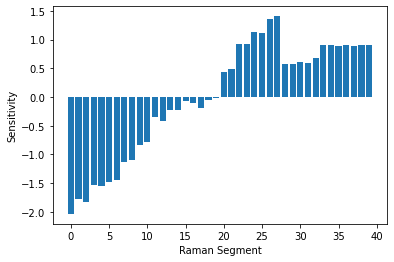

In [23]:
print(results)
axis =[]
for n in range(40):
    axis.append(n)
#print(axis)

plt.xlabel('Raman Segment')
plt.ylabel('Sensitivity')
plt.bar(axis, results)
plt.savefig('Analysis.tif', dpi = 400)
plt.show()

